In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9f1c9f49a18b7e4039a6f831d748a4f


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bethel
Processing Record 2 of Set 13 | bonfim
Processing Record 3 of Set 13 | jamestown
Processing Record 4 of Set 13 | saint anthony
Processing Record 5 of Set 13 | albany
Processing Record 6 of Set 13 | mar del plata
Processing Record 7 of Set 13 | east london
Processing Record 8 of Set 13 | asfi
Processing Record 9 of Set 13 | nhulunbuy
Processing Record 10 of Set 13 | khatanga
Processing Record 11 of Set 13 | arraial do cabo
Processing Record 12 of Set 13 | hokitika
Processing Record 13 of Set 13 | kapaa
Processing Record 14 of Set 13 | port alfred
Processing Record 15 of Set 13 | avarua
Processing Record 16 of Set 13 | moanda
Processing Record 17 of Set 13 | tuatapere
Processing Record 18 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 13 | itarema
Processing Record 20 of Set 13 | seoul
Processing Record 21 of Set 13 | mys shmidta
City not found. Skipping...


Processing Record 30 of Set 16 | tocache
Processing Record 31 of Set 16 | byron bay
Processing Record 32 of Set 16 | saint george
Processing Record 33 of Set 16 | cabo san lucas
Processing Record 34 of Set 16 | lebu
Processing Record 35 of Set 16 | norman wells
Processing Record 36 of Set 16 | tuktoyaktuk
Processing Record 37 of Set 16 | boa vista
Processing Record 38 of Set 16 | halalo
City not found. Skipping...
Processing Record 39 of Set 16 | hithadhoo
Processing Record 40 of Set 16 | codrington
Processing Record 41 of Set 16 | inhambane
Processing Record 42 of Set 16 | pakokku
Processing Record 43 of Set 16 | valer
Processing Record 44 of Set 16 | skalistyy
City not found. Skipping...
Processing Record 45 of Set 16 | regina
Processing Record 46 of Set 16 | balugaon
Processing Record 47 of Set 16 | te anau
Processing Record 48 of Set 16 | viborg
Processing Record 49 of Set 16 | arawa
Processing Record 50 of Set 16 | tasiilaq
Processing Record 1 of Set 17 | acapulco
Processing Recor

Processing Record 15 of Set 20 | bouna
Processing Record 16 of Set 20 | los llanos de aridane
Processing Record 17 of Set 20 | holme
Processing Record 18 of Set 20 | dinar
Processing Record 19 of Set 20 | muncar
Processing Record 20 of Set 20 | kandrian
Processing Record 21 of Set 20 | wamba
Processing Record 22 of Set 20 | humboldt
Processing Record 23 of Set 20 | emba
Processing Record 24 of Set 20 | aykhal
Processing Record 25 of Set 20 | bolungarvik
City not found. Skipping...
Processing Record 26 of Set 20 | meyungs
City not found. Skipping...
Processing Record 27 of Set 20 | lagoa
Processing Record 28 of Set 20 | winona
Processing Record 29 of Set 20 | petawawa
Processing Record 30 of Set 20 | mugur-aksy
Processing Record 31 of Set 20 | coquimbo
Processing Record 32 of Set 20 | acari
Processing Record 33 of Set 20 | sri aman
Processing Record 34 of Set 20 | yongchang
Processing Record 35 of Set 20 | lerwick
Processing Record 36 of Set 20 | wattegama
Processing Record 37 of Set 20

Processing Record 3 of Set 24 | rankovce
Processing Record 4 of Set 24 | morfelden-walldorf
Processing Record 5 of Set 24 | abu samrah
Processing Record 6 of Set 24 | yatou
Processing Record 7 of Set 24 | ivanteyevka
Processing Record 8 of Set 24 | sakaraha
Processing Record 9 of Set 24 | richards bay
Processing Record 10 of Set 24 | paita
Processing Record 11 of Set 24 | severnyy
Processing Record 12 of Set 24 | waingapu
Processing Record 13 of Set 24 | moree
Processing Record 14 of Set 24 | bo rai
Processing Record 15 of Set 24 | gigmoto
Processing Record 16 of Set 24 | ambilobe
Processing Record 17 of Set 24 | banda aceh
Processing Record 18 of Set 24 | waw
Processing Record 19 of Set 24 | verkhoyansk
Processing Record 20 of Set 24 | chirongui
Processing Record 21 of Set 24 | samalaeulu
City not found. Skipping...
Processing Record 22 of Set 24 | dingle
Processing Record 23 of Set 24 | mayo
Processing Record 24 of Set 24 | koumac
Processing Record 25 of Set 24 | porto seguro
Process

In [16]:
len(city_data)

549

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,36.48,91,100,5.75,US,2022-02-04 20:14:42
1,Bonfim,3.0833,-59.9500,90.27,42,95,6.02,BR,2022-02-04 20:18:43
2,Jamestown,42.0970,-79.2353,24.12,61,100,4.00,US,2022-02-04 20:18:43
3,Saint Anthony,45.0205,-93.2180,11.25,61,20,5.99,US,2022-02-04 20:18:44
4,Albany,42.6001,-73.9662,25.92,87,100,3.00,US,2022-02-04 20:14:00
5,Mar Del Plata,-38.0023,-57.5575,76.08,89,75,1.99,AR,2022-02-04 20:16:49
6,East London,-33.0153,27.9116,68.72,84,100,7.81,ZA,2022-02-04 20:15:18
7,Asfi,32.2994,-9.2372,66.88,49,97,15.86,MA,2022-02-04 20:15:26
8,Nhulunbuy,-12.2333,136.7667,81.21,83,100,5.75,AU,2022-02-04 20:18:45
9,Khatanga,71.9667,102.5000,-35.81,100,64,3.40,RU,2022-02-04 20:18:45


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]

In [19]:
city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-02-04 20:14:42,41.3712,-73.4140,36.48,91,100,5.75
1,Bonfim,BR,2022-02-04 20:18:43,3.0833,-59.9500,90.27,42,95,6.02
2,Jamestown,US,2022-02-04 20:18:43,42.0970,-79.2353,24.12,61,100,4.00
3,Saint Anthony,US,2022-02-04 20:18:44,45.0205,-93.2180,11.25,61,20,5.99
4,Albany,US,2022-02-04 20:14:00,42.6001,-73.9662,25.92,87,100,3.00
5,Mar Del Plata,AR,2022-02-04 20:16:49,-38.0023,-57.5575,76.08,89,75,1.99
6,East London,ZA,2022-02-04 20:15:18,-33.0153,27.9116,68.72,84,100,7.81
7,Asfi,MA,2022-02-04 20:15:26,32.2994,-9.2372,66.88,49,97,15.86
8,Nhulunbuy,AU,2022-02-04 20:18:45,-12.2333,136.7667,81.21,83,100,5.75
9,Khatanga,RU,2022-02-04 20:18:45,71.9667,102.5000,-35.81,100,64,3.40


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/04/22'

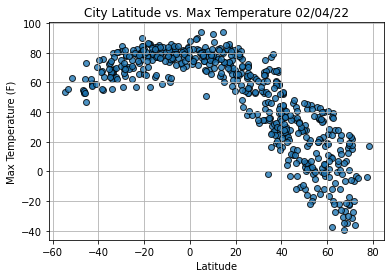

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

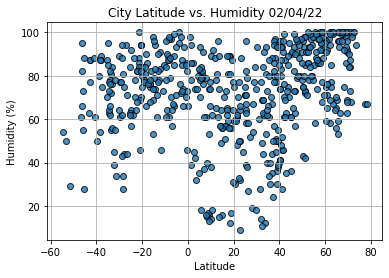

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

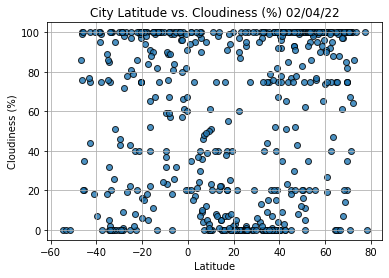

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

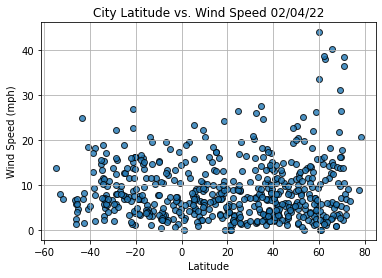

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [38]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Lat                      -33.5906
Lng                        26.891
Max Temp                    68.05
Humidity                       81
Cloudiness                    100
Wind Speed                   7.14
Country                        ZA
Date          2022-02-04 20:18:47
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
544     True
545     True
546     True
547    False
548     True
Name: Lat, Length: 549, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,36.48,91,100,5.75,US,2022-02-04 20:14:42
1,Bonfim,3.0833,-59.9500,90.27,42,95,6.02,BR,2022-02-04 20:18:43
2,Jamestown,42.0970,-79.2353,24.12,61,100,4.00,US,2022-02-04 20:18:43
3,Saint Anthony,45.0205,-93.2180,11.25,61,20,5.99,US,2022-02-04 20:18:44
4,Albany,42.6001,-73.9662,25.92,87,100,3.00,US,2022-02-04 20:14:00


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

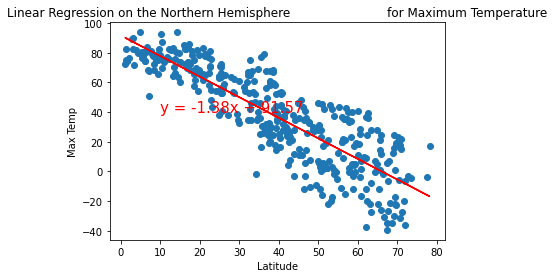

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

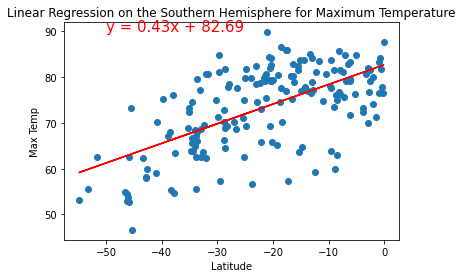

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


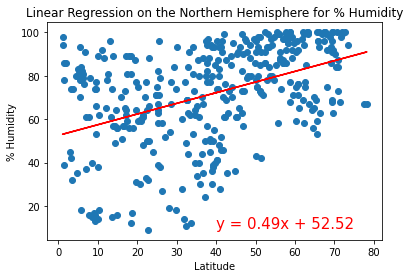

In [46]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

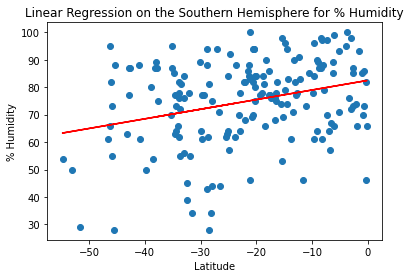

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

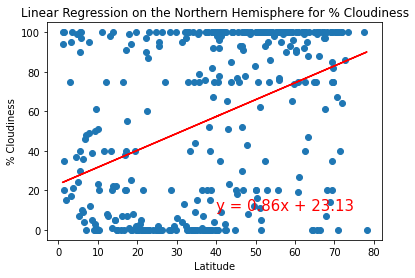

In [53]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

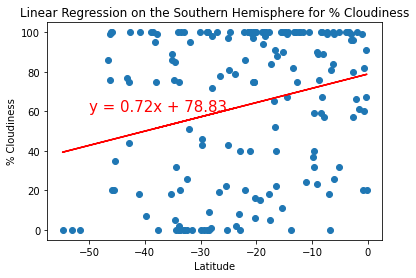

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

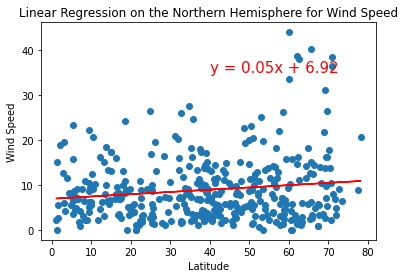

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

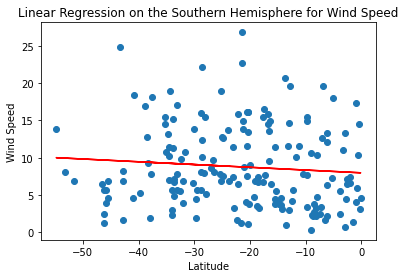

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))